In [5]:
# python peripherals
import sys
from pathlib import Path
from typing import Callable

import matplotlib.pyplot as plt

sys.path.append('../../.')

# numpy
import numpy

# torch
import torch

# matplotlib
import matplotlib
import matplotlib.pyplot
import matplotlib.axes

# deep-signature
from deep_signature.core.base import SeedableObject
from deep_signature.manifolds.planar_curves.implementation import PlanarCurvesManager, PlanarCurve
from deep_signature.manifolds.planar_curves.groups import EuclideanGroup, SimilarityGroup, EquiaffineGroup, AffineGroup
from deep_signature.core import discrete_distributions
from deep_signature.training import datasets
from deep_signature.training.networks import DeepSignaturesNet
from deep_signature.training.activations import Sine
from deep_signature.manifolds.planar_curves.evaluation import PlanarCurvesApproximatedSignatureComparator, PlanarCurvesShapeMatchingEvaluator
from deep_signature.manifolds.planar_curves.groups import EquiaffineGroup, Group

SeedableObject.set_seed(seed=42)

In [2]:
planar_curves_manager_smooth = PlanarCurvesManager(curves_file_paths=[Path("C:/deep-signature-data/curves/train/curves.npy")])

In [36]:
supporting_points_count = 9
sample_points = 2 * supporting_points_count + 1
sampling_ratio = 0.5
multimodality = 10

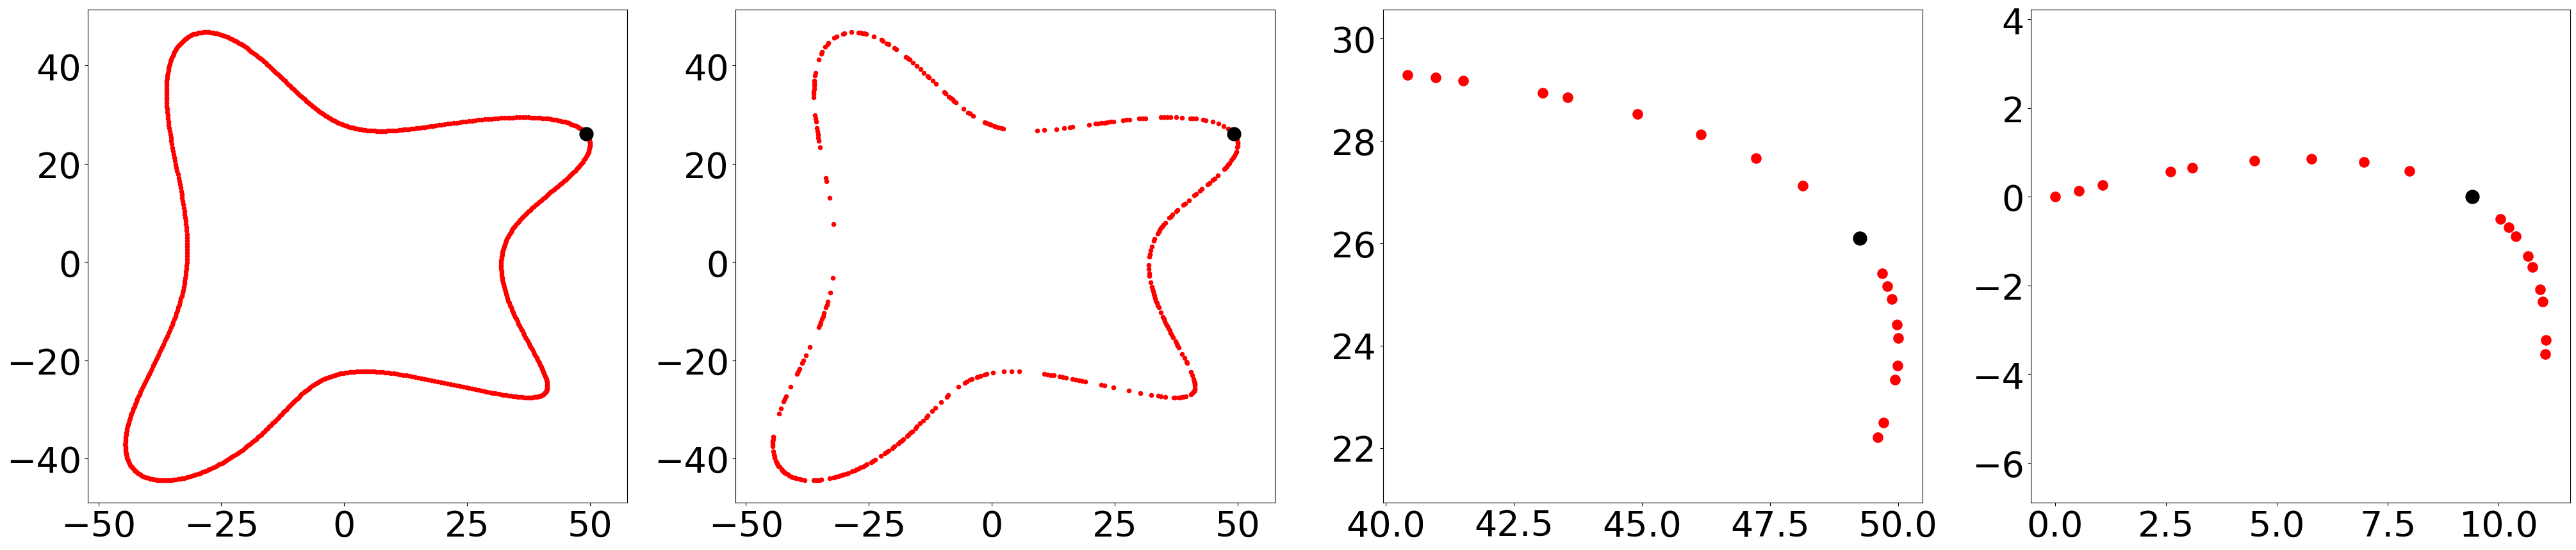

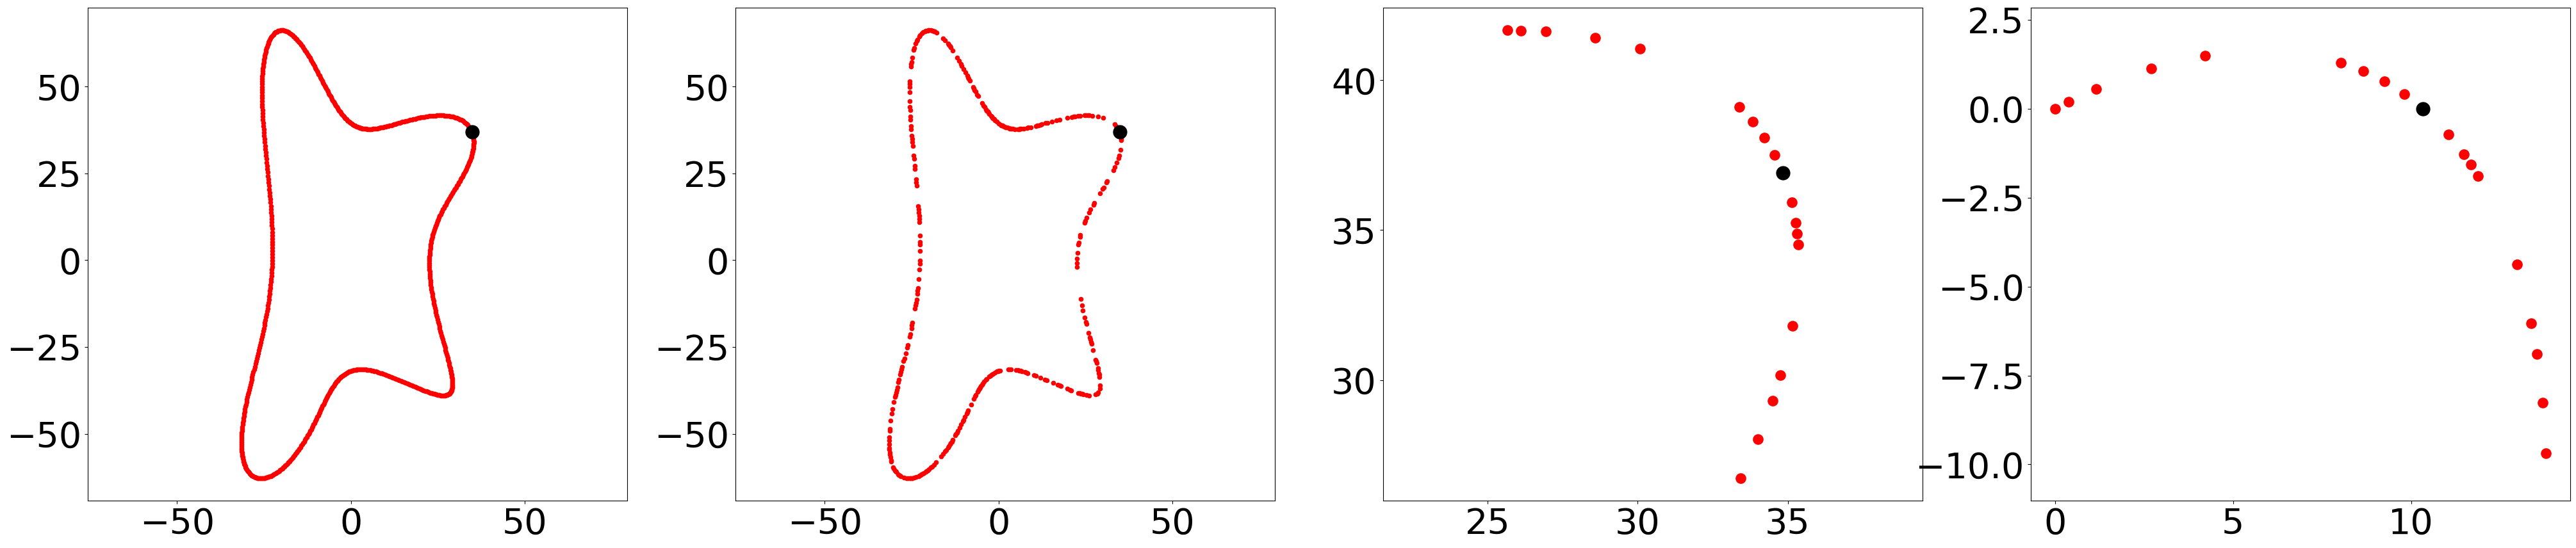

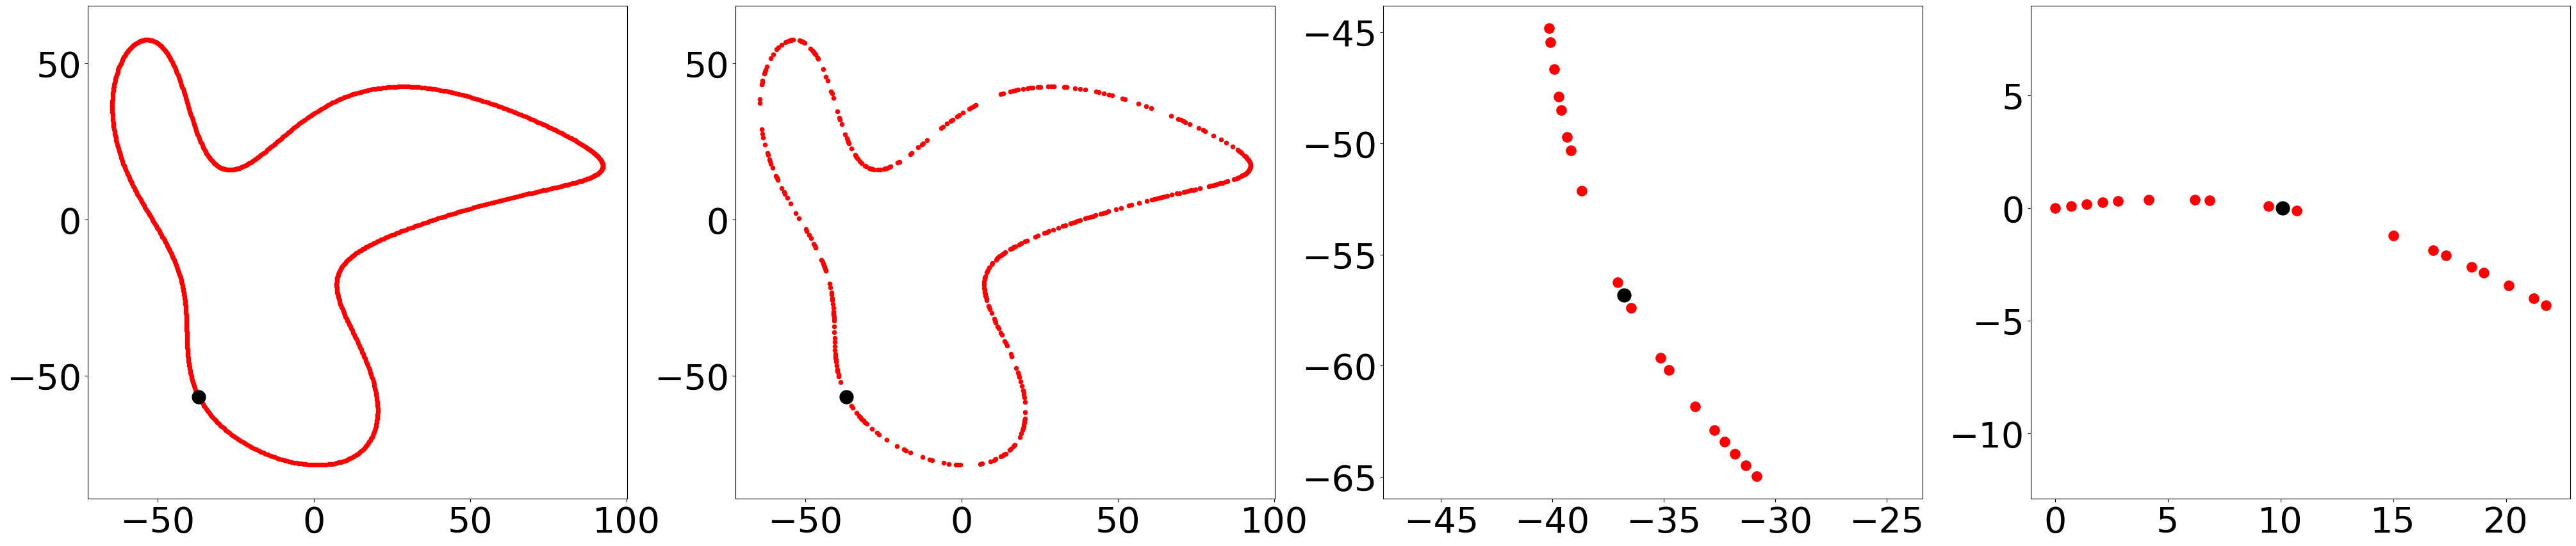

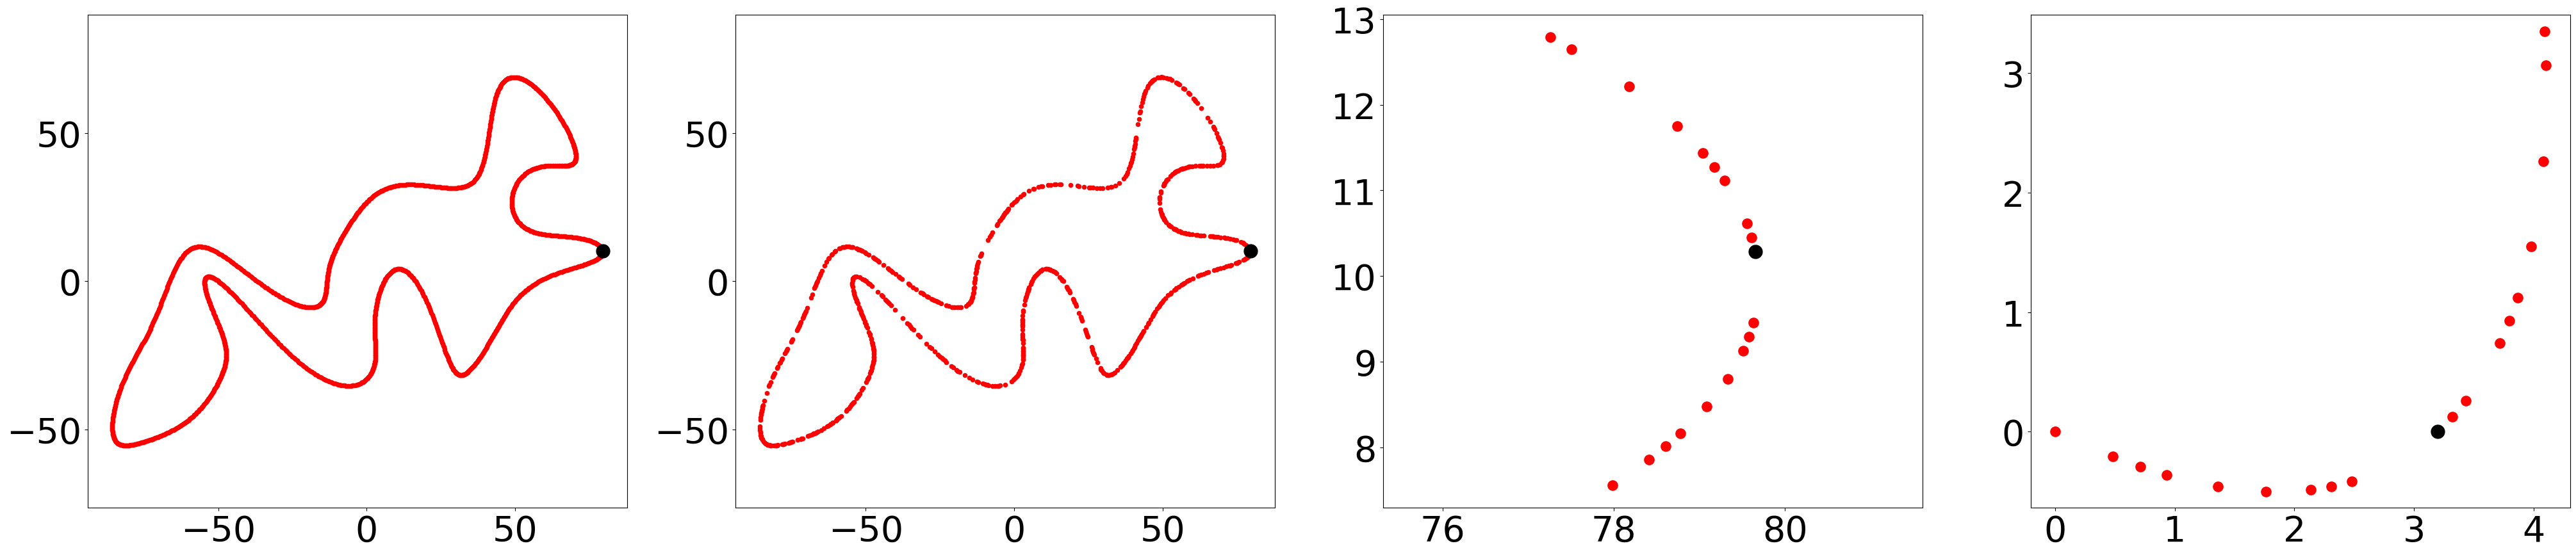

In [64]:
def plot_dot(ax: matplotlib.axes.Axes, center_point: numpy.ndarray):
    color = 'black'
    markersize = 30
    ax.plot(center_point[0], center_point[1], color=color, markersize=markersize, linestyle='', marker='.')

def plot_diagram_line(curve: PlanarCurve, center_point_index: int, figure_name: str):
    point_size = 20
    neighborhood_point_size = 120
    labelsize = 40
    color = 'red'
    fig1, ax = matplotlib.pyplot.subplots(nrows=1, ncols=4, figsize=(50, 10))

    for axis in ax:
        axis.tick_params(axis='both', which='major', labelsize=labelsize)
        axis.tick_params(axis='both', which='minor', labelsize=labelsize)

    center_point = curve.points[center_point_index]
    curve.plot_scattered_curve(ax=ax[0], cmap=None, color=color, point_size=point_size)
    plot_dot(ax=ax[0], center_point=center_point)

    discrete_distribution = discrete_distributions.MultimodalGaussianDiscreteDistribution(bins_count=curve.points_count, multimodality=multimodality)
    sampled_curve = curve.sample_curve(sampling_ratio=sampling_ratio, discrete_distribution=discrete_distribution)
    sampled_curve.plot_scattered_curve(ax=ax[1], cmap=None, color=color, point_size=point_size)
    plot_dot(ax=ax[1], center_point=center_point)

    curve_neighborhood = sampled_curve.extract_curve_neighborhood(center_point_index=center_point_index, supporting_points_count=supporting_points_count)
    curve_neighborhood.plot_scattered_curve(ax=ax[2], cmap=None, color=color, point_size=neighborhood_point_size)
    plot_dot(ax=ax[2], center_point=center_point)

    curve_neighborhood = curve_neighborhood.normalize_curve(force_ccw=False, force_endpoint=False)
    curve_neighborhood.plot_scattered_curve(ax=ax[3], cmap=None, color=color, point_size=neighborhood_point_size)
    plot_dot(ax=ax[3], center_point=curve_neighborhood.points[supporting_points_count])

    plt.savefig(f"C:/digarams/fig_{figure_name}.svg", transparent=True)

    # curve_neighborhood = sampled_curve.extract_curve_neighborhood(center_point_index=center_point_index, supporting_points_count=supporting_points_count)
    # curve_neighborhood.plot_scattered_curve(ax=ax[2], cmap=None, color='red')
    # ax[2].plot(center_point[0], center_point[1], color='green', markersize=10, linestyle='', marker='.')

center_point_index = 0
curve_index = 102

group = EquiaffineGroup(min_cond=2, max_cond=2, seed=42)
anchor = planar_curves_manager_smooth.planar_curves[curve_index]
positive = anchor.transform_curve(transform=group.generate_random_group_action(radians_u=0, radians_v=0))

negative1 = planar_curves_manager_smooth.planar_curves[170]
negative2 = planar_curves_manager_smooth.planar_curves[130]


plot_diagram_line(curve=anchor, center_point_index=center_point_index, figure_name='anchor')
plot_diagram_line(curve=positive, center_point_index=center_point_index, figure_name='positive')
plot_diagram_line(curve=negative1, center_point_index=320, figure_name='negative1')
plot_diagram_line(curve=negative2, center_point_index=center_point_index, figure_name='negative2')